<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di un caso reale**:  Telco customer churn

Imposta e realizza un modello predittivo per calcolare il tasso d'abbandono di ciascun cliente usando i dati a disposizione *Telco_customer_churn.csv*,
seguendo i seguenti passi:

- Definire il tipo di problema di apprendimento 
- EDA
- Data preprocessing
- Data Modeling
- Optimization hyperparameter
- Model Evaluation
- Aggiungi delle conclusioni da portare a un ipotetico cliente (che non sa nulla di data science) per convincerlo che il tuo modello predittivo è valido. Inoltre porta qualche esempio di come ne può beneficiare il suo business

Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

More Info: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Esercizio extra facoltativo:

Come puoi salvare il modello per riutilizzarlo?



---
---

## 1. Librerie e impostazioni

In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

pd.set_option('display.max_columns', 100)
np.set_printoptions(precision=7, suppress=True)

---
## 2. EDA

In [42]:
df = pd.read_csv("Telco_customer_churn.csv")

In [4]:
print('\nFirst 5 rows of the Dataset:')
display(df.head(5))

print('\nLast 5 rows of the Dataset:')
display(df.tail(5))


First 5 rows of the Dataset:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices



Last 5 rows of the Dataset:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [5]:
#Shape del Dataset
print('\nCi sono {} samples e {} colonne.'.format(df.shape[0], df.shape[1]))

#Lista delle colonne
print('\nLista delle colonne: \n\n{}'.format(df.columns))


Ci sono 7043 samples e 33 colonne.

Lista delle colonne: 

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [6]:
#Descrizione delle colonne
descr_col = {
    'CustomerID' : '...',
    'Count' : 'A value used in reporting/dashboarding to sum up the number of customers in a filtered set.',
    'Country' : '...',
    'State' : '...',
    'City' : '...',
    'Zip Code' : '...',
    'Lat Long' : '...',
    'Latitude' : '...',
    'Longitude' : '...',
    'Gender' : 'Whether the customer is a male or a female',
    'SeniorCitizen' : 'Whether the customer is a senior citizen or not (1, 0)',
    'Partner' : 'Whether the customer has a partner or not (Yes, No)',
    'Dependents' : 'Whether the customer has dependents or not (Yes, No)',
    'Tenure Months' : 'Number of months the customer has stayed with the company',
    'Phone Service' : 'Whether the customer has a phone service or not (Yes, No)',
    'Multiple Lines' : 'Whether the customer has multiple lines or not (Yes, No, No phone service)',
    'Internet Service' : 'Customer’s internet service provider (DSL, Fiber optic, No)',
    'Online Security' : 'Whether the customer has online security or not (Yes, No, No internet service)',
    'Online Backup' : 'Whether the customer has online backup or not (Yes, No, No internet service)',
    'Device Protection' : 'Whether the customer has device protection or not (Yes, No, No internet service)',
    'Tech Support' : 'Whether the customer has tech support or not (Yes, No, No internet service)',
    'Streaming TV' : 'Whether the customer has streaming TV or not (Yes, No, No internet service)',
    'Streaming Movies' : 'Whether the customer has streaming movies or not (Yes, No, No internet service)',
    'Contract' : 'The contract term of the customer (Month-to-month, One year, Two year)',
    'Paperless Billing' : 'Whether the customer has paperless billing or not (Yes, No)',
    'Payment Method' : 'The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))',
    'Monthly Charges' : ' Indicates the customer’s current total monthly charge for all their services from the company.',
    'Total Charges' : 'Indicates the customer’s total charges, calculated to the end of the quarter specified above.',
    'Churn Label' : 'Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.',
    'Churn Value' : ' 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label',
    'Churn Score' : 'A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler.',
    'CLTV' : 'Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.',
    'Churn Reason' : 'A customer’s specific reason for leaving the company. Directly related to Churn Category.'
}

print('\nDescrizione di tutte le colonne:')

descr_col



Descrizione di tutte le colonne:


{'CustomerID': '...',
 'Count': 'A value used in reporting/dashboarding to sum up the number of customers in a filtered set.',
 'Country': '...',
 'State': '...',
 'City': '...',
 'Zip Code': '...',
 'Lat Long': '...',
 'Latitude': '...',
 'Longitude': '...',
 'Gender': 'Whether the customer is a male or a female',
 'SeniorCitizen': 'Whether the customer is a senior citizen or not (1, 0)',
 'Partner': 'Whether the customer has a partner or not (Yes, No)',
 'Dependents': 'Whether the customer has dependents or not (Yes, No)',
 'Tenure Months': 'Number of months the customer has stayed with the company',
 'Phone Service': 'Whether the customer has a phone service or not (Yes, No)',
 'Multiple Lines': 'Whether the customer has multiple lines or not (Yes, No, No phone service)',
 'Internet Service': 'Customer’s internet service provider (DSL, Fiber optic, No)',
 'Online Security': 'Whether the customer has online security or not (Yes, No, No internet service)',
 'Online Backup': 'Whether t

In [7]:
#Analisi colonna Churn Reason
print('\nChurn Reason: \n\n{}'.format(df["Churn Reason"].unique()))


Churn Reason: 

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' nan]


In [8]:
#Customers' countries

print('\nCustomers\' countries: \n\n{}'.format(df["Country"].unique()))


Customers' countries: 

['United States']


In [9]:
#Descrizione statistica di tutte le colonne contenenti valori numerici
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [10]:
#Analisi colonna target, quanti hanno lasciato e quanti sono rimasti
print('\nCount of the values inside the Target column: \n\n0: No Churn.\n1: Yes Churn\n\n{}'.format(df["Churn Value"].value_counts()))


Count of the values inside the Target column: 

0: No Churn.
1: Yes Churn

Churn Value
0    5174
1    1869
Name: count, dtype: int64


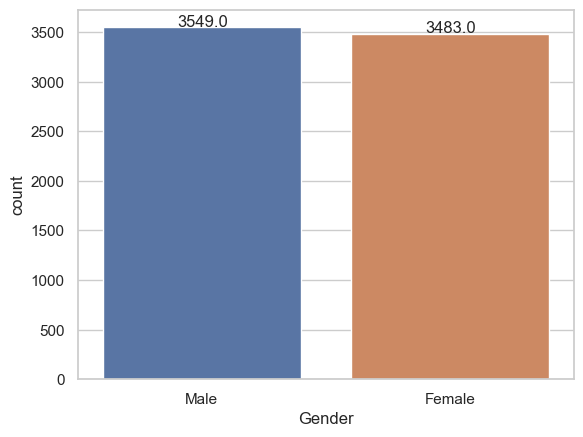

In [86]:
sns.set_theme(style="whitegrid")

a1 = sns.countplot(data=df, x="Gender")
# Use annotate function to add count labels to each bar
for p in a1.patches:
    a1.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() +10))


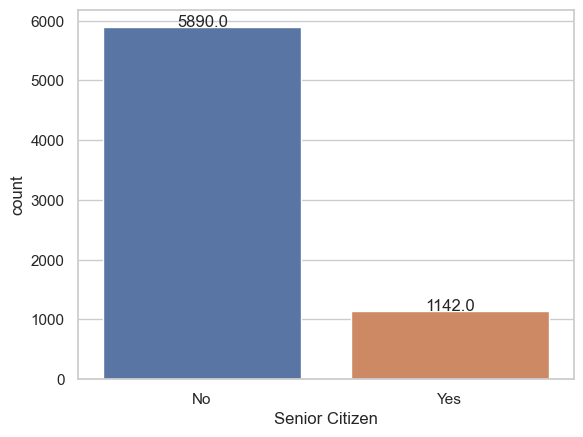

In [92]:
a2 = sns.countplot(data=df, x="Senior Citizen")
# Use annotate function to add count labels to each bar
for p in a2.patches:
    a2.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() +10))


---
## 3.Definire il tipo di problema di apprendimento 

**Target**:

- __0__: __No__ Churn
- __1__: __Yes__ Churn

__Osservazioni__:

- Principalmente è un problema di classificazione, il cliente lascia oppure no.
- E' possibile ricavare anche una percentuale indicativa sulla probabilità di abbandono del cliente.
- Bisogna generalizzare il cliente che vuole disdire il servizio senza badare ai dati geografici.
- La maggior parte delle colonne hanno valori binari.
- Dopo quanto tempo abbandona?

__Modelli utilizzabili__:

- __Decision trees__: Very fast, don’t need scaling of the data, can be visualized and easily explained.
- __Logistic regression__: a classification algorithm and not a
regression algorithm, and it should not be confused with LinearRegression
- __Naive Bayes__: Only for classification. Even faster than linear models, good for very large data‐
sets and high-dimensional data. Often less accurate than linear models.

__Colonne non utili al training__:

- CustomerID
- Count
- Country
- State
- City
- Zip Code
- Lat Long
- Latitude
- Longitude
- Churn Label
- Churn Value
- Churn Score
- Churn Reason

__Colonne utili al traning__:

- Gender
- SeniorCitizen
- Partner
- Dependents
- Tenure Months
- Phone Service
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies
- Contract
- Paperless Billing
- Payment Method
- Monthly Charges
- Total Charges
- CLTV
---

## 4. Data preprocessing

In [43]:
#Rimozione delle righe stringhe o valori con uno spazio riferiti alla colonna Total Charges
#Salvataggio all'interno di una nuova cvariabile df_opt per optimized

df.drop(df[df["Total Charges"] == ' '].index, inplace= True)

#resettaggio degli indici
#df.reset_index(inplace= True)

In [44]:
#Lista delle colonne da droppare perché non utili al training
drop_columns = ['CustomerID',
                'Count',
                'Country',
                'State',
                'City',
                'Zip Code',
                'Lat Long',
                'Latitude',
                'Longitude',
                'Churn Label',
                'Churn Value',
                'Churn Score',
                'Churn Reason'
                ]

In [45]:
#Dataframe ottimizzati
df_opt = df.drop(columns = drop_columns)

#Serie Target per l'addestramento dei modelli
df_target = df['Churn Value']

In [46]:
cat = ["Gender", 'Senior Citizen', 'Partner', 
       "Phone Service", 'Dependents', 'Phone Service', 
       "Multiple Lines", "Internet Service", "Online Security", 
       "Online Backup", "Tech Support", "Streaming TV", 
       "Streaming Movies", "Contract", 'Paperless Billing', 
       'Payment Method','Device Protection']

one_hot_encoded = pd.get_dummies(df_opt[cat])

df_opt.drop(columns=cat, inplace=True)

df_opt = pd.concat([df_opt, one_hot_encoded], axis= 1)

In [47]:
#Shape del Dataset df_opt
print('\nCi sono {} samples e {} colonne in df_opt.'.format(df_opt.shape[0], df_opt.shape[1]))

print('\nFirst 5 rows of the df_opt:')
display(df_opt.head(5))

print('\nLast 5 rows of the df_opt:')
display(df_opt.tail(5))

#Shape del Dataset df_target
print('\nCi sono {} samples in df_target.'.format(len(df_target)))


Ci sono 7032 samples e 49 colonne in df_opt.

First 5 rows of the df_opt:


,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Phone Service_No,Phone Service_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Device Protection_No,Device Protection_No internet service,Device Protection_Yes
0,2,53.85,108.15,3239,False,True,True,False,True,False,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False
1,2,70.70,151.65,2701,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
2,8,99.65,820.5,5372,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True
3,28,104.80,3046.05,5003,True,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True
4,49,103.70,5036.3,5340,False,True,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,True



Last 5 rows of the df_opt:


,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Phone Service_No,Phone Service_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Device Protection_No,Device Protection_No internet service,Device Protection_Yes
7038,72,21.15,1419.4,5306,True,False,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,True,False,False,False,False,True,False
7039,24,84.80,1990.5,2140,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True
7040,72,103.20,7362.9,5560,True,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True
7041,11,29.60,346.45,2793,True,False,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
7042,66,105.65,6844.5,5097,False,True,True,False,True,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,True



Ci sono 7032 samples in df_target.


---

## 5. Model Evaluation, Grid Search Cross Validation: Decision trees


In [16]:
#Tipologia di modello scelto
dec_tree = RandomForestClassifier(n_jobs=6)

#Lista dei parametri da analizzare
param_grid = {'n_estimators': [10, 20, 30, 40, 60, 80, 100, 160, 200, 250, 320],
 'max_depth': [1, 2, 4, 8, 16, 32]}

# StratifiedKFold strati esterni, divisione per 5
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# StratifiedKFold strati interni per ogni fold, divizione per 3
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


Schema funzionamento metodo cross_validate per nested cross-validation:

<img src="cross-validation.png" alt="cross-validation" width="40%">


__Attenzione__: il codice sottostante ha funzionato per 2min e 40secondi per la nested cross-validation, vengono usati 6 core, se si può aumentare.

In [18]:
#Nested cross-validation, qua ho più informazioni rispetto al metodo di prima
cv_results_A = cross_validate(GridSearchCV(dec_tree, param_grid, scoring='accuracy', cv=inner_cv),
 df_opt, df_target, cv=outer_cv, scoring='accuracy')


In [19]:
cv_results_A

{'fit_time': array([42.4593723, 45.6877327, 38.176832 , 44.9716501, 46.9912446]),
 'score_time': array([0.0119679, 0.019948 , 0.0488696, 0.0279257, 0.0528574]),
 'test_score': array([0.7974414, 0.8052594, 0.8029872, 0.8150782, 0.8108108])}

In [20]:
print("Mean cross-validation score of RandomForestClassifier: ", cv_results_A['test_score'].mean())

Mean cross-validation score:  0.8063154052941955


---

## 6. Model Evaluation, Grid Search Cross Validation: LogisticRegression

In [87]:
#Tipologia di modello scelto
log_reg = LogisticRegression(n_jobs=6)

#Lista dei parametri da analizzare
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# StratifiedKFold strati esterni, divisione per 5
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# StratifiedKFold strati interni per ogni fold, divizione per 3
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


__Attenzione__: il codice sottostante ha funzionato per 1min e 45secondi per la nested cross-validation, vengono usati 6 core, se si può aumentare.

In [89]:
#Nested cross-validation, unione della cross validation(folds) e grid search (per gli iper-parametri)
cv_results_B = cross_validate(GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=inner_cv),
 df_opt, df_target, cv=outer_cv, scoring='accuracy')

In [93]:
cv_results_B

{'fit_time': array([25.2207563, 22.7814546, 22.2252188, 22.3457248, 20.7471435]),
 'score_time': array([0.0029917, 0.0029931, 0.0029645, 0.0029914, 0.0029922]),
 'test_score': array([0.8095238, 0.8059701, 0.8129445, 0.8100996, 0.8179232])}

In [95]:
print("Mean cross-validation score of LogisticRegression: ", cv_results_B['test_score'].mean())

Mean cross-validation score of LogisticRegression:  0.8112922483700172


---
---

---
---

In [23]:
X = df_opt  #è il dataframe definito in alto, pulito e codificato senza la colonna target al suo interno
y = df_target   #la colonna target in formato array

feature_names = num + ohe.get_feature_names_out(cat).tolist()

print(X.shape, y.shape)
print(feature_names) 

NameError: name 'num' is not defined

## splitting

In [ ]:
#split train-test
splitter = StratifiedShuffleSplit(random_state= rnd, test_size= 0.2, n_splits= 1)

train_idx, test_idx = next(splitter.split(X, y))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

X_train.shape, X_test.shape


In [ ]:
#split train-validation
rnd = 10
splitter_val = StratifiedShuffleSplit(random_state= rnd, test_size= 0.2, n_splits= 1)

train_idx, val_idx = next(splitter_val.split(X_train, y_train))

X_val, y_val = X_train[val_idx], y_train[val_idx]
X_train, y_train = X_train[train_idx], y_train[train_idx]

X_train.shape, X_val.shape, X_test.shape


# Modeling

Bisogna calcolare il tasso di abbandono dei clienti, e in funzione di questo stabilire se il cliente è portato ad abbandonare l'azienda o meno. Il modello che meglio si adatta per questo tipo di lavoro è la regressione logistica (prima determina una % e poi divide il risultato in classi)

In [ ]:
X_train[0,:]

In [ ]:
#normalizzazione dati
X_num = MinMaxScaler().fit_transform(X_train[:,0:3])
X_train[:,0:3] = X_num

In [ ]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

In [ ]:
y_pred = logr.predict(X_val)

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logr.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logr.score(X_val, y_val)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_val, y_pred)))


In [ ]:
cm = confusion_matrix(y_pred, y_val)
sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu")

In [ ]:
# Regressione logistica istanziata 
logrCV = LogisticRegressionCV()

# Training del modello
logrCV.fit(X_train, y_train)

y_pred = logr.predict(X_val)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

# Generiamo un dataset fittizio per l'esempio
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=0,
                           random_state=42)

# Creiamo un modello di Regressione Logistica
model = LogisticRegression()

# Creiamo uno scalatore standard e una pipeline per il nostro modello
pipe = Pipeline([('scaler', MinMaxScaler()), ('model', logrCV)])

# Definiamo la strategia di Cross Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcoliamo le performance del nostro modello tramite Cross Validation
scores = cross_val_score(pipe, X, y, cv=cv_strategy)

# Visualizziamo i risultati della Cross Validation
plt.plot(scores)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross Validation Scores')
plt.show()
